## Insights Task

In [1]:
from util import read_data_to_pandas, customized_plot, group_count_unstack
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import scipy.stats as stats

In [2]:
DATA_PATH = 'http://www9.health.gov.au/cda/source/display_doc.cfm?DocID=1'

### Question 1: What can you tell us about this dataset? 

In [4]:
data = read_data_to_pandas(DATA_PATH)
print('Observations: {}, Fields: {}'. format(data.shape[0], data.shape[1]))
data.head()

Observations: 681254, Fields: 6


,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype
0,2018-01-05 00:00:00,NSW,00-04,Female,not available,B
1,2018-01-05 00:00:00,NSW,00-04,Female,not available,B
2,2018-01-05 00:00:00,NSW,00-04,Male,not available,A(unsubtyped)
3,2018-01-05 00:00:00,NSW,20-24,Male,not available,B
4,2018-01-05 00:00:00,NSW,25-29,Male,not available,A(unsubtyped)


The data set contains a total of `681254` observation across `6` fields - `Week Ending (Friday)`, `State`, `Age  group`, `Sex`, `Indigenous status`, and `Type/Subtype`. For summary ananlysis as below, I grouped the observations by date i.e the `Week Ending (Friday)` field.  

In [5]:
data_temp = data.copy()
weekly_flu_count = data_temp.groupby(['Week Ending (Friday)']).size()

In [6]:
weekly_flu_count.describe()

count      523.000000
mean      1302.588910
std       3016.786268
min         15.000000
25%        147.500000
50%        328.000000
75%        917.500000
max      24004.000000
dtype: float64

**Summary Statistics**<br>
After grouping, we have a total of `523` data points within the period in review (`Jan. 2008 - Jan. 2018`). The maximum and mininmum case counts were `24004` and `15` respectively. Weekly average Flu case count was approximately `1303` with standard deviation of `~3017`. This is a highly varied data set considering the standard deviation and the min/max values.

<AxesSubplot:title={'center':'Weekly Flu Count Distribution - Nationwide'}, ylabel='Frequency'>

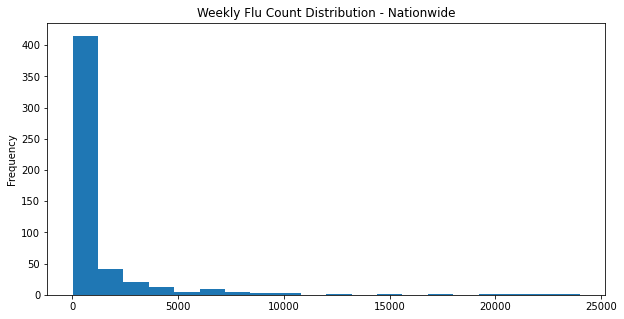

In [7]:
weekly_flu_count.plot(kind='hist', bins=20, 
                      figsize=(10,5),
                      title='Weekly Flu Count Distribution - Nationwide',
                     )

**Destribution** <br>
Referencing, the histogram plot above, this is an highly skew data with most of the weekly count values recorded ranging between `0` and `5000`.

<AxesSubplot:title={'center':'Flu Record Trend: 2008 - 2018'}, xlabel='Nation Wide Count', ylabel='Time Period'>

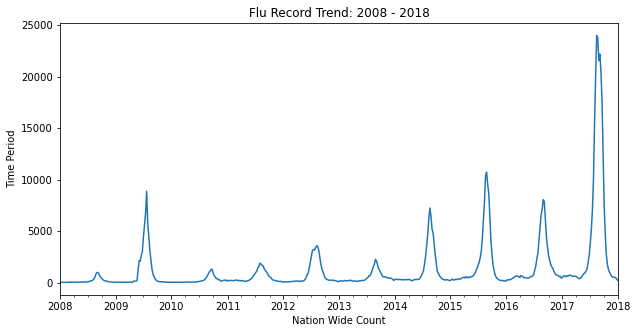

In [8]:
weekly_flu_count.plot(title='Flu Record Trend: 2008 - 2018', 
               xlabel='Nation Wide Count', 
               ylabel='Time Period',
               figsize=(10,5))

**Seasonality**<br>
The chart above is the plot of the sum of weekly counts across all Australia states. It shows a slight upward trend and an approximately `12` month seasonal period.

### Question 2: Which state and age group has the most flu cases over the years and did the trend change?

Adding year column. This will aid further summarization of the data and help in generation clearer charts

In [9]:
data['Year'] = data['Week Ending (Friday)'].apply(lambda x: str(x).split('-')[0])
data.head()

,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype,Year
0,2018-01-05 00:00:00,NSW,00-04,Female,not available,B,2018
1,2018-01-05 00:00:00,NSW,00-04,Female,not available,B,2018
2,2018-01-05 00:00:00,NSW,00-04,Male,not available,A(unsubtyped),2018
3,2018-01-05 00:00:00,NSW,20-24,Male,not available,B,2018
4,2018-01-05 00:00:00,NSW,25-29,Male,not available,A(unsubtyped),2018


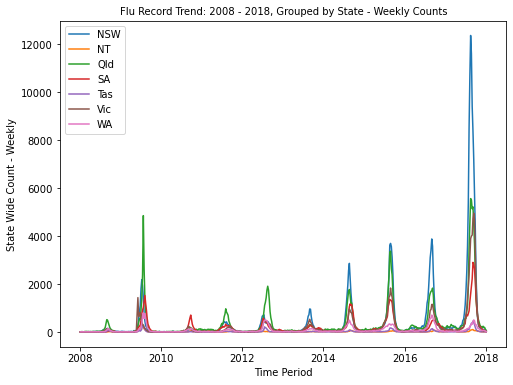

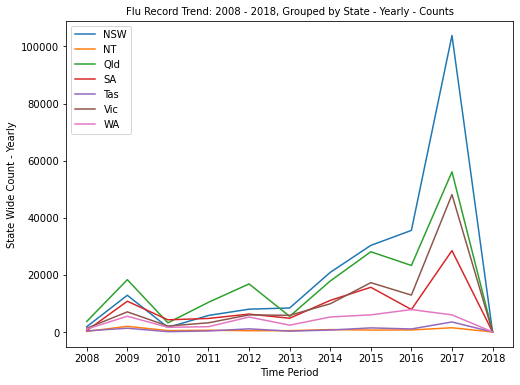

In [10]:
customized_plot(group_count_unstack(data, 'Week Ending (Friday)', 'State', 'State'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by State - Weekly Counts', 
                xlabel='Time Period',
                ylabel='State Wide Count - Weekly')

customized_plot(group_count_unstack(data, 'Year', 'State', 'State'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by State - Yearly - Counts', 
                xlabel='Time Period',
                ylabel='State Wide Count - Yearly')

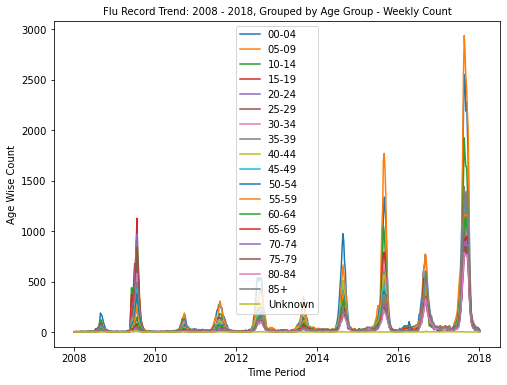

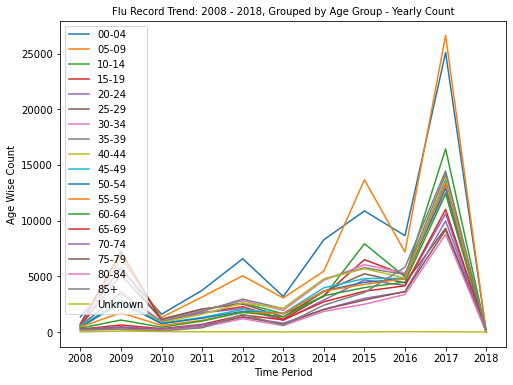

In [11]:
customized_plot(group_count_unstack(data, 'Week Ending (Friday)', 'Age  group', 'Age  group'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Age Group - Weekly Count', 
                xlabel='Time Period',
                ylabel='Age Wise Count')

customized_plot(group_count_unstack(data, 'Year', 'Age  group', 'Age  group'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Age Group - Yearly Count', 
                xlabel='Time Period',
                ylabel='Age Wise Count')

### Answer
According to the State wide plot shown above, untill around the end of 2012, Queensland (QLD) used to be the state with the most flu cases. <br>
The trend changed and NSW started leading in the chart from around the begining of 2013. 

The Age Group with the highest Flu cases mostly alternated between the `00-04` and `05-09` age groups over the 10 full year period (2008 - 2017).

### Question 3: Which flu type or subtype is most serious in Australia? 

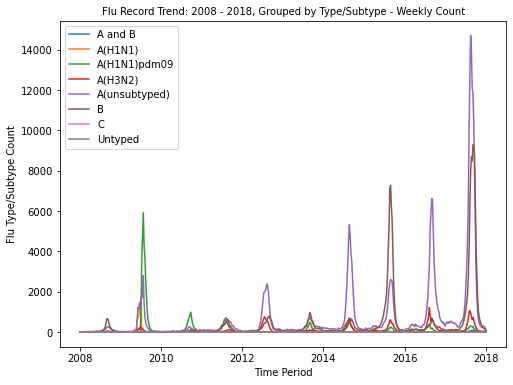

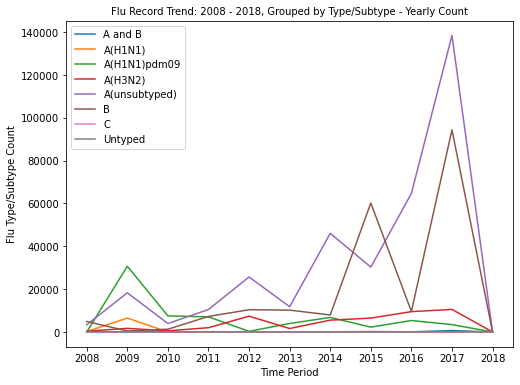

In [12]:
customized_plot(group_count_unstack(data, 'Week Ending (Friday)', 'Type/Subtype', 'Type/Subtype'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Type/Subtype - Weekly Count', 
                xlabel='Time Period',
                ylabel='Flu Type/Subtype Count')

customized_plot(group_count_unstack(data, 'Year', 'Type/Subtype', 'Type/Subtype'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Type/Subtype - Yearly Count', 
                xlabel='Time Period',
                ylabel='Flu Type/Subtype Count')

### Answer
The A(H1N1)pdm09 Flu type was the most wide spread in Australia prior to 2010. The trend changed around the begining of 2010 leaving the A(unsubtyped) as the most serious Flu in the country untill 2018. There was a surge in the B Flu type between the end of 2014 and the begining of 2015, but this only lasted a short while before the A(unsubtyped) tookover again.

### Question 4: Does female and male get affected by flu differently?

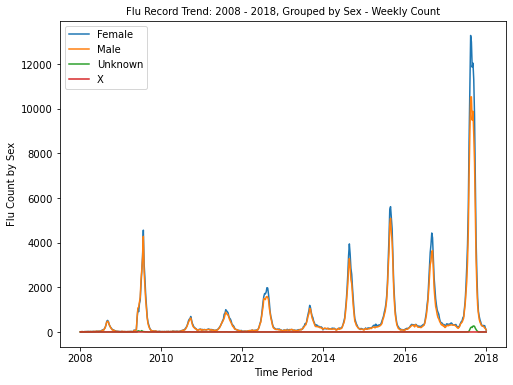

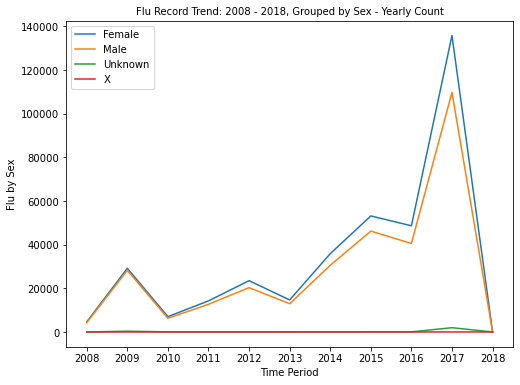

array([[<AxesSubplot:title={'center':'Female'}>,
        <AxesSubplot:title={'center':'Male'}>],
       [<AxesSubplot:title={'center':'Unknown'}>,
        <AxesSubplot:title={'center':'X'}>]], dtype=object)

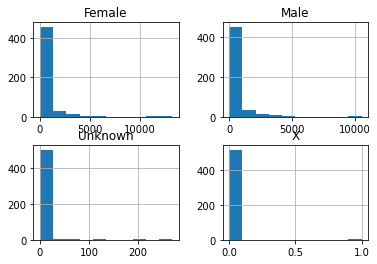

In [13]:
customized_plot(group_count_unstack(data, 'Week Ending (Friday)', 'Sex', 'Sex'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Sex - Weekly Count', 
                xlabel='Time Period',
                ylabel='Flu Count by Sex')

customized_plot(group_count_unstack(data, 'Year', 'Sex', 'Sex'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Sex - Yearly Count', 
                xlabel='Time Period',
                ylabel='Flu by Sex')

group_count_unstack(data, 'Week Ending (Friday)', 'Sex', 'Sex').hist()

**Statistical testing**<br>

Going by the plots above, it looks like there's no significant difference in the distribution of flu cases for Male and Female. Although the numbers are consitenly higher (slightly) for Female than Male for the whole period. A statitical (A/B) test will shed more light on this. Hypothesis - **there is signifcant difference in the distributions Flu among the Male and Female groups**.

In [14]:
data_groupedby_sex = group_count_unstack(data, 'Week Ending (Friday)', 'Sex', 'Sex')
data_groupedby_sex.reset_index(drop=True, inplace=True)

#get the female and male data as series
female_series = data_groupedby_sex.loc[:, 'Female']
male_series = data_groupedby_sex.loc[:, 'Male']

#let's see the difference in there means
f_mean, m_mean = np.mean(female_series), np.mean(male_series)
print('The Female and Male series means are {} and {}, the difference is: {}'.format(f_mean, m_mean, f_mean-m_mean))

#t-testing
print('\n', stats.ttest_ind(female_series, male_series))

The Female and Male series means are 701.3938814531549 and 596.2026768642447, the difference is: 105.19120458891018

 Ttest_indResult(statistic=1.130018510232071, pvalue=0.2587279753829828)


**Conclusion:** <br>
Going by the `tvalue` (~`1.13`), the probalility of getting this figure or higher without a difference between the male and female distribution is `1/4` (the pvalue). This shows that the null-hypthothesis is significant - we cannot conviniently say that flu affects the male and female genders differently.

### Question 5: Is state, sex, indigenous status or age a driver for flu?

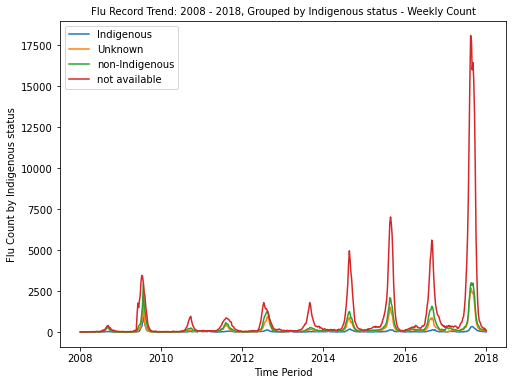

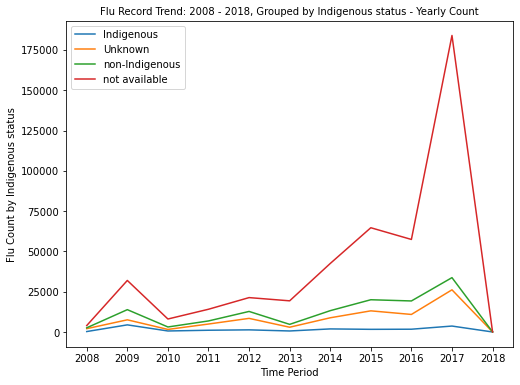

In [15]:
customized_plot(group_count_unstack(data, 'Week Ending (Friday)', 'Indigenous status', 'Indigenous status'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Indigenous status - Weekly Count', 
                xlabel='Time Period',
                ylabel='Flu Count by Indigenous status')

customized_plot(group_count_unstack(data, 'Year', 'Indigenous status', 'Indigenous status'), 
                title='Flu Record Trend: 2008 - 2018, Grouped by Indigenous status - Yearly Count', 
                xlabel='Time Period',
                ylabel='Flu Count by Indigenous status')

### Answer:

- **State:** The number of reported flu cases within the period in this data were highly influenced by state, with QLD and NSW playing dominant roles. We can conclude that State is a driver for flu in Australia
- **Age:** The age groups `00-04` and `05-09` contributed most of the flus cases within the reviewed period. Therefore, age is a driver for flu in Australia for this period. 
- **Sex:** The dominance classes in Sex are Male and Female. As shown in the A/B test above, there's no statical difference in the distrubtion of these two classes over the period in review. Therefore we can say that Sex is not a driver flu.
- **Indegenous Status:** Majority of the cases either do not have Indegenous Status reported or were not know. Therefore we cannot determine with the current data if indegous status is a driver for flu in Australia.

**PS:** The conclusions and overall analysis are limited to the period of Jan. 2008 and Jan. 2018